[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1qkQXEI7xGhMEMN0nDQyfXVBpcTFGQc-d#scrollTo=X9JbpdBjrUWY&uniqifier=1)


### Import libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline,TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, roc_curve, roc_auc_score, SCORERS

### Frame the Problem and Look at the Big Picture

#### 1. Define the objective in business terms.

Using historical data, build a machine learning model to predict if an applicant is 'good' or 'bad' client,

#### 2. How will your solution be used?

It will be used to approve or deny a credit card to the applicant

#### 3. What are the current solutions/workarounds (if any)?

Expert credit risk modeler or other machine learning model

#### 4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?

its a supervised univariate classification problem.

#### 5. How should performance be measured?

- Confusion Matrix
- Accuracy(require to fix the imbalance data first)
- ROC AUC(because the data is imbalance)
- Precision, Recall, and F-1 Score

#### 6. Is the performance measure aligned with the business objective?


Not applicable

#### 7. What would be the minimum performance needed to reach the business objective?

70% < 

#### 8. What are comparable problems? Can you reuse experience or tools?

Not applicable

#### 9. Is human expertise available?

No 

#### 10. How would you solve the problem manually?

With expert subject matter

#### 11. List the assumptions you (or others) have made so far.

Not applicable

#### 12. Verify assumptions if possible.

Not applicable

### Get the Data

#### 1. List the data you need and how much you need.

application_record.csv file and we need all the data

#### 2. Find and document where you can get that data.

https://www.kaggle.com/rikdifos/credit-card-approval-prediction

#### 3. Check how much space it will take.

70 MB

#### 4. Check legal obligations, and get authorization if necessary.

Not applicable

#### 5. Get access authorizations.

Not applicable

#### 6. Create a workspace (with enough storage space).

Done!

#### 7. Get the data.

#### Calculate the label and get the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_record.csv to credit_record.csv


In [ ]:
uploaded = files.upload()

Saving application_record.csv to application_record.csv


In [ ]:
data_2 = pd.read_csv('application_record.csv')
record = pd.read_csv('credit_record.csv')
ls = list(data_2.columns)
ls.remove('ID')
ls 

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS']

In [ ]:
data_2.drop_duplicates(subset=ls,keep='first',inplace=True)

In [ ]:
begin_month=pd.DataFrame(record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'Account age'}) 
application=pd.merge(data_2,begin_month,how="left",on="ID")
record['dep_value'] = None
record['dep_value'][record['STATUS'] =='2']='Yes' 
record['dep_value'][record['STATUS'] =='3']='Yes' 
record['dep_value'][record['STATUS'] =='4']='Yes' 
record['dep_value'][record['STATUS'] =='5']='Yes'
cpunt=record.groupby('ID').count()
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes' 
cpunt['dep_value'][cpunt['dep_value'] == 0]='No' 
cpunt = cpunt[['dep_value']]

In [ ]:
application = pd.merge(application,cpunt,how='inner',on='ID')
application['Is high risk']=application['dep_value']
application.loc[application['Is high risk']=='Yes','Is high risk']=1
application.loc[application['Is high risk']=='No','Is high risk']=0
application.drop('dep_value',axis=1,inplace=True)
application = application.rename(columns={
    'CODE_GENDER':'Sex',
    'FLAG_OWN_CAR':'Has a car',
    'FLAG_OWN_REALTY':'Has a property',
    'CNT_CHILDREN':'Children count',
    'AMT_INCOME_TOTAL':'Income',
    'NAME_INCOME_TYPE':'Income category',
    'NAME_EDUCATION_TYPE':'Education level',
    'NAME_FAMILY_STATUS':'Marital status',
    'NAME_HOUSING_TYPE':'Way of living',
    'DAYS_BIRTH':'Days since birth',
    'DAYS_EMPLOYED': 'Days since employment (positive means unemployed)',
    'FLAG_MOBIL': 'Has a mobile phone',
    'FLAG_WORK_PHONE': 'Has a work phone',
    'FLAG_PHONE': 'Has a phone',
    'FLAG_EMAIL': 'Has an email',
    'OCCUPATION_TYPE': 'Occupation',
    'CNT_FAM_MEMBERS': 'Family size'
})
application
warnings.filterwarnings('always')

application.head()

In [ ]:
from google.colab import drive
drive.mount('/drive')

/usr/lib/python3.7/threading.py:874: ResourceWarning: unclosed file <_io.FileIO name=61 mode='wb' closefd=True>
  del self._target, self._args, self._kwargs
/usr/lib/python3.7/threading.py:874: ResourceWarning: unclosed file <_io.FileIO name=62 mode='rb' closefd=True>
  del self._target, self._args, self._kwargs
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x7fc42833a520>


Mounted at /drive


In [ ]:
application.to_csv(
    '/drive/My Drive/Colab Notebooks/saved from colab/cc_application_colab.csv',
    sep=',',
    na_rep=np.nan,
    columns=[
    'Sex',
    'Days since birth',
    'Marital status',
    'Family size',
    'Children count',
    'Way of living',
    'Income',
    'Occupation',
    'Income category',
    'Education level',
    'Days since employment (positive means unemployed)',
    'Has a car',
    'Has a property',
    'Has a mobile phone',
    'Has a work phone',
    'Has a phone',
    'Has an email',
    'Is high risk'],
    
)


In [ ]:
application = pd.read_csv('/drive/My Drive/Colab Notebooks/saved from colab/cc_application_colab.csv')
application.shape

(9709, 19)

In [ ]:
application.drop(['Unnamed: 0'],axis=1,inplace=True)

#### 8.  Convert the data to a format you can easily manipulate (without changing the data itself).

Not applicable

#### 9. Ensure sensitive information is deleted or protected (e.g., anonymized).

Not applicable

#### 10. Check the size and type of data (time series, sample, geographical, etc.).

70 MB and it is a tabular data

#### 11. Calculate the label

#### 12. Fix the imbalance data, sample a test set, put it aside, and never look at it (no data snooping!).

In [ ]:
application_train, application_test = train_test_split(application,test_size=.2)

### Explore the Data

#### 1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).

In [ ]:
application_train_copy = application_train.copy()

#### 2. Create a Jupyter notebook to keep a record of your data exploration.

#### 3. Study each attribute and its characteristics: 
   - Name
   - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
   - % of missing values
   - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
   - Usefulness for the task
   - Type of distribution (Gaussian, uniform, logarithmic, etc.)

In [ ]:
application_train_copy.columns

Index(['Sex', 'Days since birth', 'Marital status', 'Family size',
       'Children count', 'Way of living', 'Income', 'Occupation',
       'Income category', 'Education level',
       'Days since employment (positive means unemployed)', 'Has a car',
       'Has a property', 'Has a mobile phone', 'Has a work phone',
       'Has a phone', 'Has an email', 'Is high risk'],
      dtype='object')

In [ ]:
application_train_copy.head(5)

,Sex,Days since birth,Marital status,Family size,Children count,Way of living,Income,Occupation,Income category,Education level,Days since employment (positive means unemployed),Has a car,Has a property,Has a mobile phone,Has a work phone,Has a phone,Has an email,Is high risk
6814,M,-15811,Married,2.0,0,House / apartment,121500.0,Laborers,Commercial associate,Secondary / secondary special,-139,Y,Y,1,0,0,0,0
4745,F,-13466,Separated,2.0,1,House / apartment,247500.0,Accountants,Commercial associate,Secondary / secondary special,-1328,Y,Y,1,0,0,0,0
516,F,-13156,Married,2.0,0,House / apartment,166500.0,Laborers,Working,Incomplete higher,-1917,N,Y,1,0,0,0,0
7397,F,-19890,Widow,1.0,0,House / apartment,225000.0,High skill tech staff,Working,Secondary / secondary special,-2384,N,Y,1,1,0,0,0
8107,F,-18447,Married,2.0,0,House / apartment,157500.0,Cooking staff,Working,Secondary / secondary special,-4632,N,N,1,1,1,0,0


In [ ]:
application_train_copy.describe()

,Days since birth,Family size,Children count,Income,Days since employment (positive means unemployed),Has a mobile phone,Has a work phone,Has a phone,Has an email,Is high risk
count,7767.000000,7767.000000,7767.000000,7.767000e+03,7767.000000,7767.0,7767.000000,7767.000000,7767.000000,7767.000000
mean,-15987.687138,2.188876,0.426033,1.802796e+05,61081.446504,1.0,0.215012,0.288142,0.087164,0.020986
std,4245.938230,0.937386,0.775399,9.794564e+04,139096.961116,0.0,0.410857,0.452927,0.282093,0.143347
min,-25140.000000,1.000000,0.000000,2.700000e+04,-15713.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,-19512.500000,2.000000,0.000000,1.125000e+05,-3000.500000,1.0,0.000000,0.000000,0.000000,0.000000
50%,-15602.000000,2.000000,0.000000,1.575000e+05,-1376.000000,1.0,0.000000,0.000000,0.000000,0.000000
75%,-12442.000000,3.000000,1.000000,2.250000e+05,-344.000000,1.0,0.000000,1.000000,0.000000,0.000000
max,-7489.000000,20.000000,19.000000,1.350000e+06,365243.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [ ]:
application_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7767 entries, 6814 to 9340
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Sex                                                7767 non-null   object 
 1   Days since birth                                   7767 non-null   int64  
 2   Marital status                                     7767 non-null   object 
 3   Family size                                        7767 non-null   float64
 4   Children count                                     7767 non-null   int64  
 5   Way of living                                      7767 non-null   object 
 6   Income                                             7767 non-null   float64
 7   Occupation                                         5382 non-null   object 
 8   Income category                                    7767 non-null   object 
 9   Educa

In [ ]:
application_train_copy["Occupation"].isna().sum()

2385

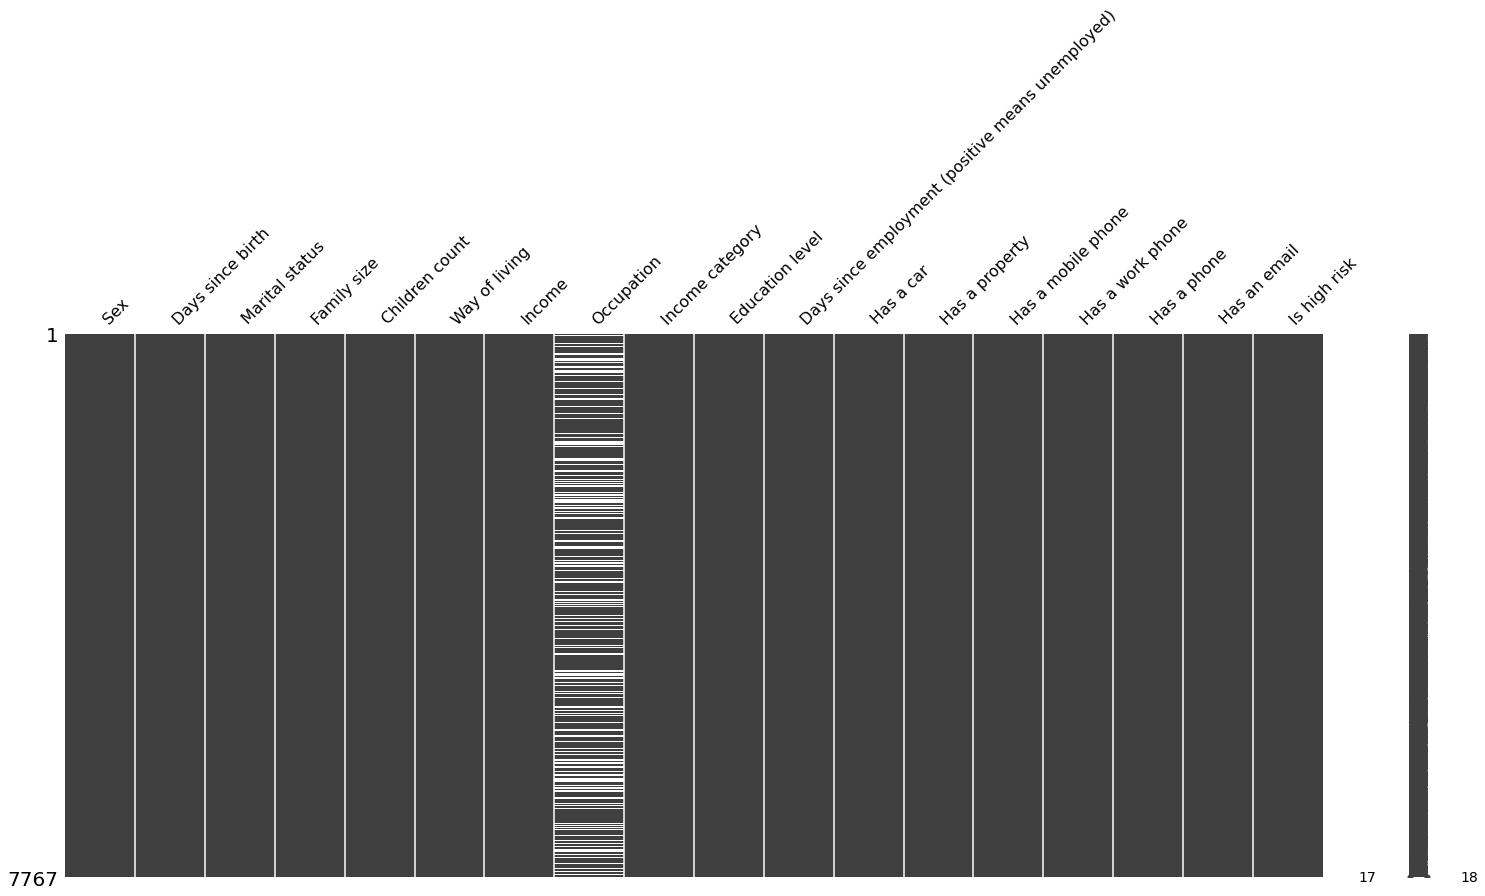

In [ ]:
msno.matrix(application_train_copy)
plt.show()

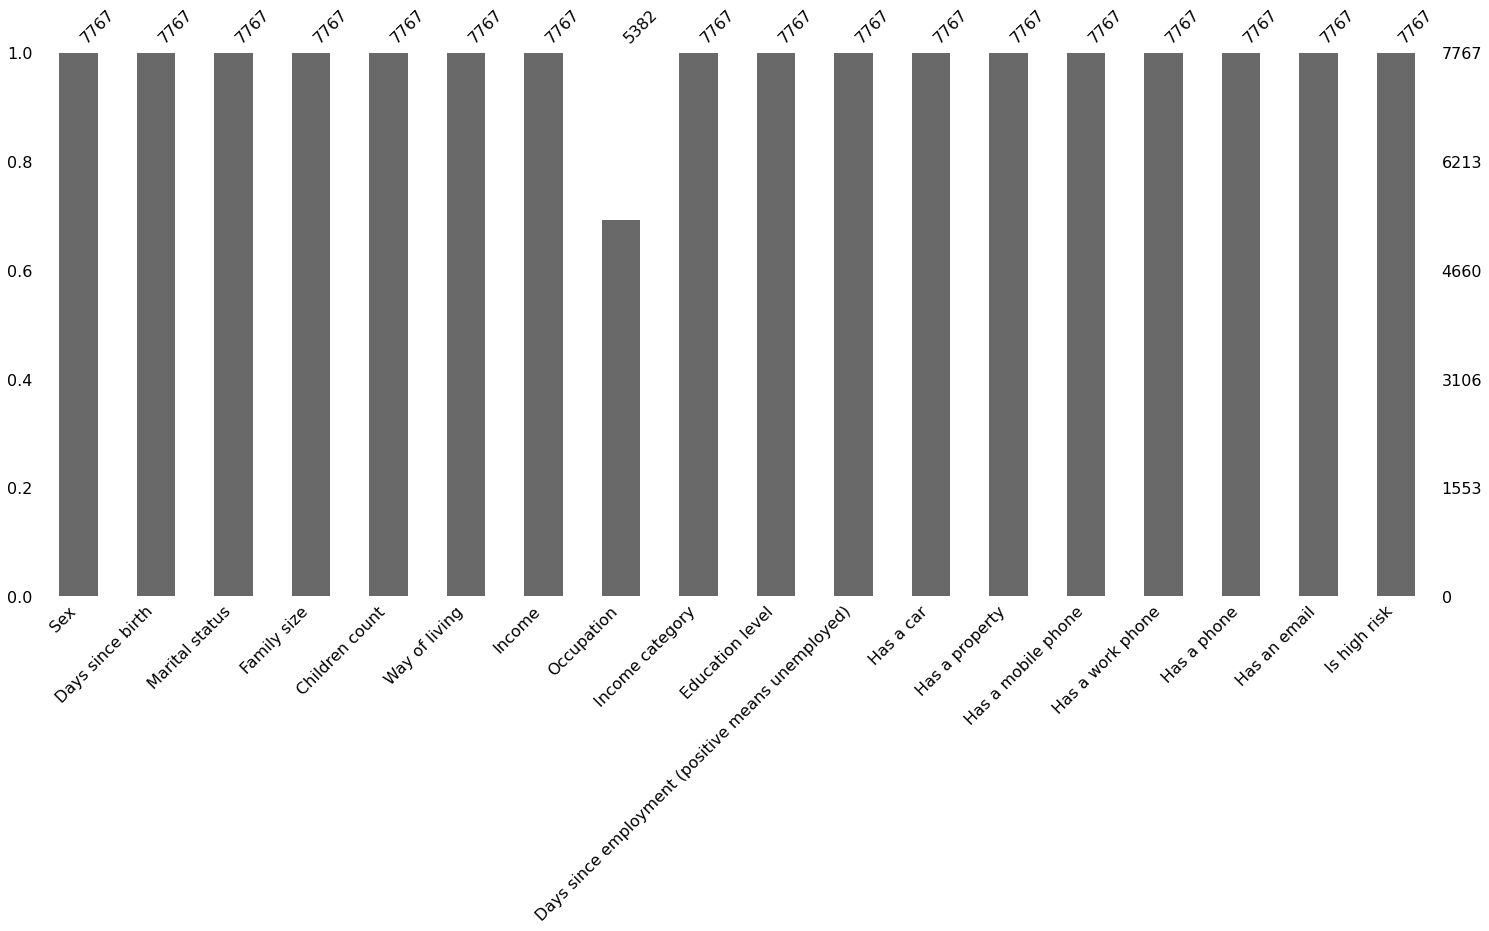

In [ ]:
msno.bar(application_train_copy)
plt.show()

#### 1. Sex 

In [ ]:
application_train_copy['Sex'].describe()

count     7767
unique       2
top          F
freq      5027
Name: Sex, dtype: object

In [ ]:
application_train_copy['Sex'].value_counts(normalize=True)

F    0.647225
M    0.352775
Name: Sex, dtype: float64

In [ ]:
application_train_copy['Sex'].value_counts()

F    5027
M    2740
Name: Sex, dtype: int64

In [ ]:
size_male_female = application_train_copy['Sex'].value_counts().values

In [ ]:
application_train_copy['Sex'].value_counts(normalize=True) * 100

F    64.722544
M    35.277456
Name: Sex, dtype: float64

In [ ]:
size_male_female

array([5027, 2740])

#### Male vs Female ratio

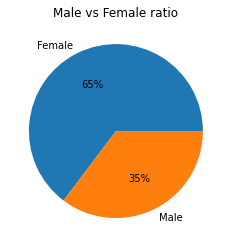

In [ ]:
plt.pie(size_male_female,labels=["Female","Male"],autopct='%1.0f%%')
plt.title('Male vs Female ratio')
plt.show()

#### Male vs Female population size

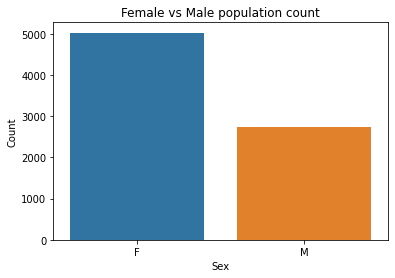

In [ ]:
sns.barplot(x=application_train_copy['Sex'].value_counts().index,y=size_male_female)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title('Female vs Male population count')
plt.show()

#### 2. Days since birth

In [ ]:
application_train_copy['Days since birth'].describe()

count     7767.000000
mean    -15987.687138
std       4245.938230
min     -25140.000000
25%     -19512.500000
50%     -15602.000000
75%     -12442.000000
max      -7489.000000
Name: Days since birth, dtype: float64

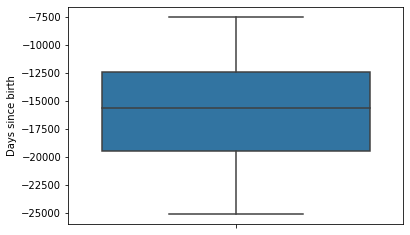

In [ ]:
sns.boxplot(y=application_train_copy["Days since birth"])
plt.show()

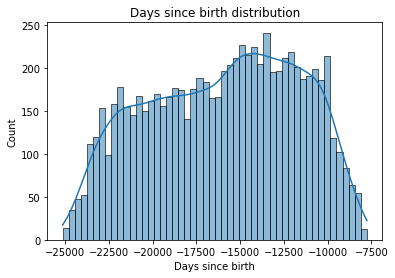

In [ ]:
sns.histplot(data=application_train_copy["Days since birth"],bins=50,kde=True)
plt.title('Days since birth distribution')
plt.show()

#### High risk individuals grouped by days since birth

In [ ]:
application_train_copy.groupby("Is high risk")['Days since birth'].mean()

Is high risk
0   -15981.390321
1   -16281.435583
Name: Days since birth, dtype: float64

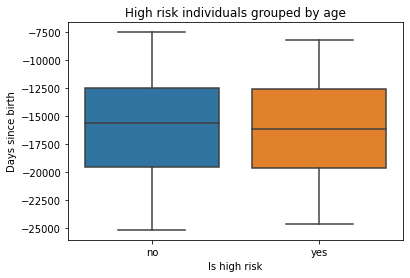

In [ ]:
sns.boxplot(y=application_train_copy["Days since birth"],x=application_train_copy["Is high risk"])
plt.xticks(ticks=[0,1],labels=["no","yes"])
plt.title('High risk individuals grouped by age')
plt.show()

#### 3. Marital status

In [ ]:
application_train_copy['Marital status'].describe()

count        7767
unique          5
top       Married
freq         5223
Name: Marital status, dtype: object

In [ ]:
application_train_copy['Marital status'].value_counts()

Married                 5223
Single / not married    1081
Civil marriage           691
Separated                458
Widow                    314
Name: Marital status, dtype: int64

In [ ]:
application_train_copy['Marital status'].unique()

array(['Married', 'Separated', 'Widow', 'Civil marriage',
       'Single / not married'], dtype=object)

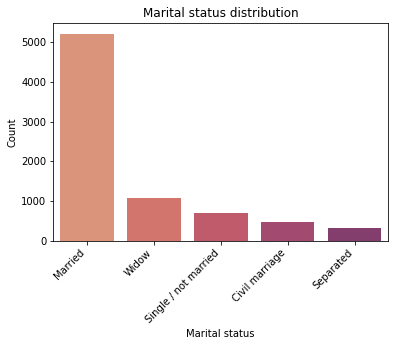

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=application_train_copy['Marital status'].value_counts().index,y=application_train_copy['Marital status'].value_counts().values,palette=sns.color_palette("flare"))
ax.set_xticklabels(labels=['Married', 'Widow', 'Single / not married', 'Civil marriage','Separated'],rotation=45,ha='right')
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.title('Marital status distribution')
plt.show()

#### High risk individuals grouped by their marital status

In [ ]:
application_train_copy.groupby('Marital status')['Is high risk'].sum()

Marital status
Civil marriage           7
Married                 92
Separated                9
Single / not married    47
Widow                    8
Name: Is high risk, dtype: int64

In [ ]:
is_high_risk_ms_grp_count = application_train_copy.groupby('Marital status')['Is high risk'].sum()

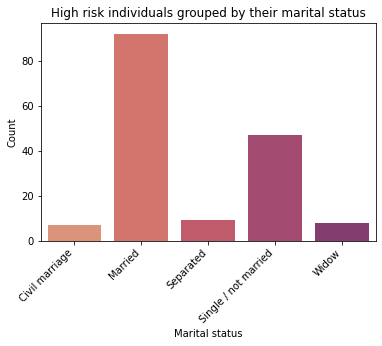

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=is_high_risk_ms_grp_count.index,y=is_high_risk_ms_grp_count.values,palette=sns.color_palette("flare"))
ax.set_xticklabels(labels=['Civil marriage','Married', 'Separated','Single / not married', 'Widow'],rotation=45, ha="right")
plt.ylabel('Count')
plt.title('High risk individuals grouped by their marital status')
plt.show()

#### 4. Family size

In [ ]:
application_train_copy['Family size'].describe()

count    7767.000000
mean        2.188876
std         0.937386
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        20.000000
Name: Family size, dtype: float64

#### Family size distribution

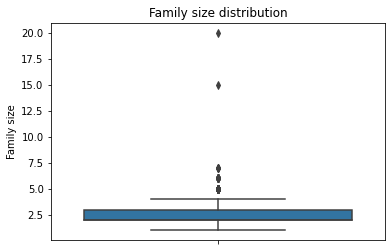

In [ ]:
sns.boxplot(y=application_train_copy['Family size'])
plt.title('Family size distribution')
plt.show()

#### High risk individual grouped by Family Size

In [ ]:
is_high_risk_fs_grp_count = application_train_copy.groupby('Family size')['Is high risk'].sum()

In [ ]:
is_high_risk_fs_grp_count

Family size
1.0     39
2.0     80
3.0     28
4.0     11
5.0      5
6.0      0
7.0      0
15.0     0
20.0     0
Name: Is high risk, dtype: int64

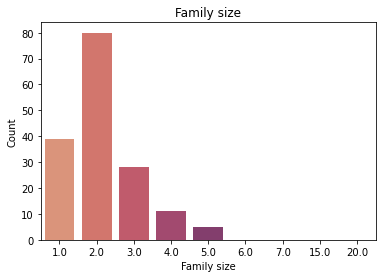

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=is_high_risk_fs_grp_count.index,y=is_high_risk_fs_grp_count.values,palette=sns.color_palette("flare"))
plt.ylabel('Count')
plt.title('Family size')
plt.show()

#### 5. Children count  

In [ ]:
application_train_copy['Children count'].describe()

count    7767.000000
mean        0.426033
std         0.775399
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        19.000000
Name: Children count, dtype: float64

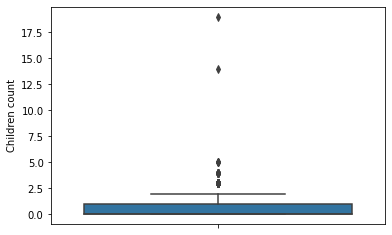

In [ ]:
sns.boxplot(y=application_train_copy['Children count'])
plt.show()

#### High risk individual grouped by children count

In [ ]:
is_high_risk_cc_grp_count = application_train_copy.groupby('Children count')['Is high risk'].sum()

In [ ]:
is_high_risk_cc_grp_count

Children count
0     108
1      36
2      14
3       5
4       0
5       0
14      0
19      0
Name: Is high risk, dtype: int64

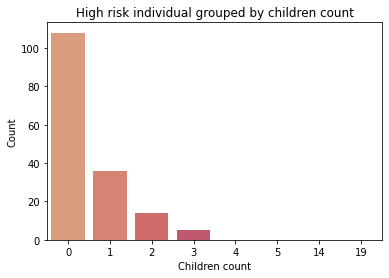

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=is_high_risk_cc_grp_count.index,y=is_high_risk_cc_grp_count.values,palette="flare")
plt.ylabel('Count')
plt.title('High risk individual grouped by children count')
plt.show()

#### 6. Way of living

In [ ]:
application_train_copy['Way of living'].describe()

count                  7767
unique                    6
top       House / apartment
freq                   6955
Name: Way of living, dtype: object

In [ ]:
application_train_copy['Way of living'].unique()

array(['House / apartment', 'With parents', 'Municipal apartment',
       'Rented apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [ ]:
application_train_copy['Way of living'].value_counts()

House / apartment      6955
With parents            355
Municipal apartment     243
Rented apartment        127
Office apartment         55
Co-op apartment          32
Name: Way of living, dtype: int64

Text(0, 0.5, 'Count')

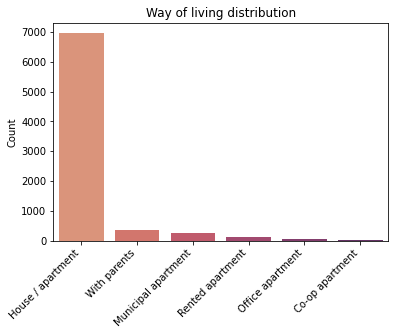

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=application_train_copy['Way of living'].value_counts().index,y=application_train_copy['Way of living'].value_counts().values,palette=sns.color_palette('flare'))
ax.set_xticklabels(labels=application_train_copy['Way of living'].value_counts().index,rotation=45, ha="right")
plt.title('Way of living distribution')
plt.ylabel('Count')

#### High risk individuals grouped by their way of living

In [ ]:
is_high_risk_wl_grp_count = application_train_copy.groupby('Way of living')['Is high risk'].sum()

In [ ]:
is_high_risk_wl_grp_count

Way of living
Co-op apartment          0
House / apartment      140
Municipal apartment     13
Office apartment         1
Rented apartment         3
With parents             6
Name: Is high risk, dtype: int64

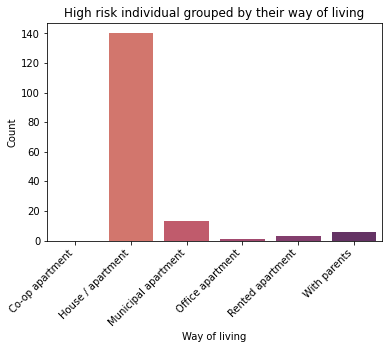

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=is_high_risk_wl_grp_count.index,y=is_high_risk_wl_grp_count.values,palette="flare")
plt.ylabel('Count')
ax.set_xticklabels(labels=is_high_risk_wl_grp_count.index,rotation=45, ha="right")
plt.title('High risk individual grouped by their way of living')
plt.show()

#### 7. Income

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
application_train_copy['Income'].describe()

count      7767.00000
mean     180279.60834
std       97945.63947
min       27000.00000
25%      112500.00000
50%      157500.00000
75%      225000.00000
max     1350000.00000
Name: Income, dtype: float64

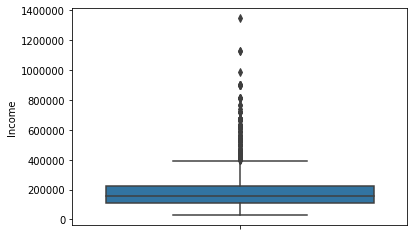

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(y=application_train_copy["Income"])
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

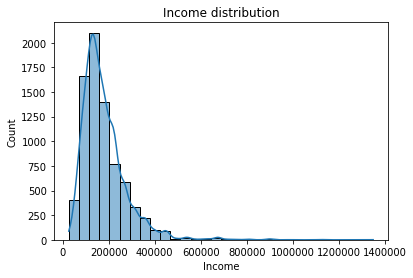

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=application_train_copy["Income"],bins=30,kde=True)
plt.title('Income distribution')
ax.ticklabel_format(useOffset=False, style='plain', axis='x')
plt.show()

#### High risk individuals grouped by income

In [ ]:
application_train_copy.groupby("Is high risk")['Income'].mean()

Is high risk
0   180268.14413
1   180814.41718
Name: Income, dtype: float64

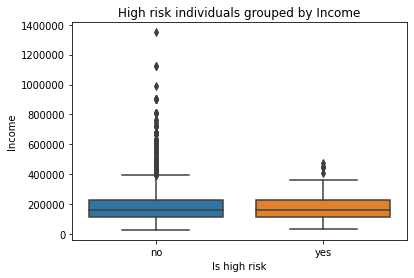

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(y=application_train_copy["Income"],x=application_train_copy["Is high risk"])
plt.xticks(ticks=[0,1],labels=["no","yes"])
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('High risk individuals grouped by Income')
plt.show()

#### 8. Occupation

In [ ]:
occupation_na = application_train_copy['Occupation'].isna().sum() 
occupation_na 

2385

In [ ]:
print("The percent of missing value is {:.2f}%".format((occupation_na*100)/len(application_train_copy['Occupation'])))

The percent of missing value is 30.71%


In [ ]:
application_train_copy['Occupation'].value_counts()

Laborers                 1400
Sales staff               739
Core staff                716
Managers                  628
Drivers                   504
High skill tech staff     289
Accountants               243
Medicine staff            227
Cooking staff             150
Security staff            143
Cleaning staff            115
Private service staff      71
Low-skill Laborers         42
Secretaries                42
Waiters/barmen staff       33
HR staff                   17
IT staff                   13
Realty agents              10
Name: Occupation, dtype: int64

#### Occupation vs income

In [ ]:
app_grouped_occupation_income = application_train_copy.groupby('Occupation')['Income'].mean()

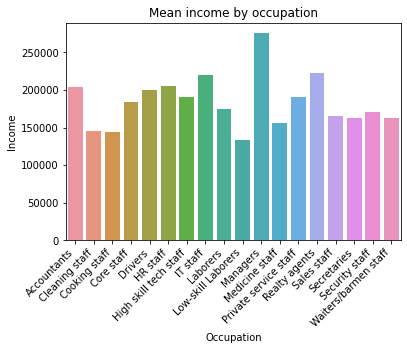

In [ ]:
sns.barplot(x=app_grouped_occupation_income.index.to_list(),y=app_grouped_occupation_income.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel('Income')
plt.xlabel('Occupation')
plt.title('Mean income by occupation')
plt.show()

In [ ]:
income_occ = pd.concat([application_train_copy['Occupation'],application_train_copy['Income']],axis=1)

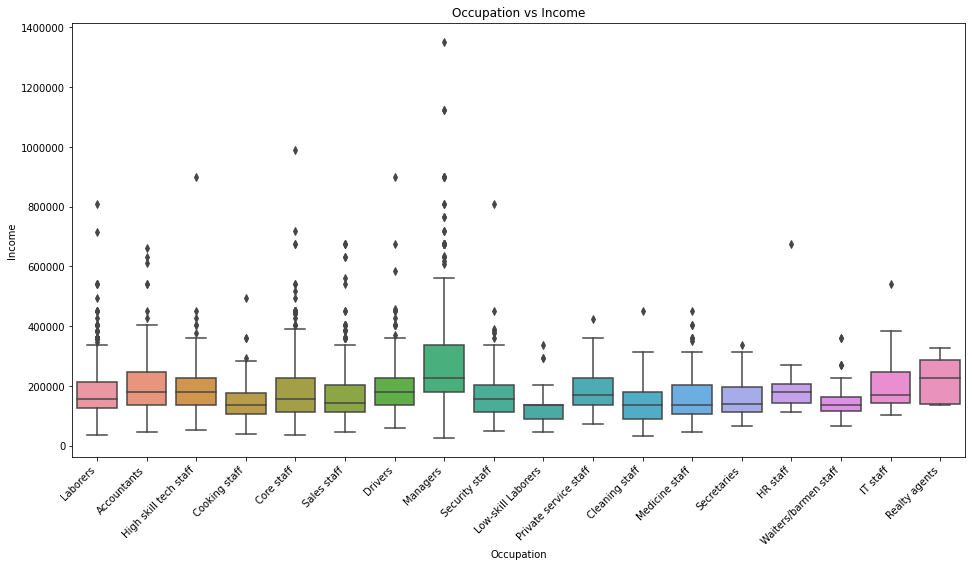

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x='Occupation',y='Income',data=income_occ)
plt.xticks(rotation=45,ha='right')
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Occupation vs Income')
plt.show()

#### High risk vs income 

In [ ]:
pd.crosstab(index=application_train_copy['Is high risk'],columns=application_train_copy['Occupation'],margins=True,normalize=False)

Occupation,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,All
Is high risk,,,,,,,,,,,,,,,,,,,
0,238,114,146,691,492,17,281,13,1372,41,617,225,70,10,730,42,140,32,5271
1,5,1,4,25,12,0,8,0,28,1,11,2,1,0,9,0,3,1,111
All,243,115,150,716,504,17,289,13,1400,42,628,227,71,10,739,42,143,33,5382


In [ ]:
pd.crosstab(index=application_train_copy['Is high risk'],columns=application_train_copy['Occupation'],margins=True,normalize='columns') * 100

Occupation,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,All
Is high risk,,,,,,,,,,,,,,,,,,,
0,97.94239,99.13043,97.33333,96.50838,97.61905,100.00000,97.23183,100.00000,98.00000,97.61905,98.24841,99.11894,98.59155,100.00000,98.78214,100.00000,97.90210,96.96970,97.93757
1,2.05761,0.86957,2.66667,3.49162,2.38095,0.00000,2.76817,0.00000,2.00000,2.38095,1.75159,0.88106,1.40845,0.00000,1.21786,0.00000,2.09790,3.03030,2.06243


#### 9. Income category

In [ ]:
application_train_copy['Income category'].describe()

count        7767
unique          5
top       Working
freq         3970
Name: Income category, dtype: object

In [ ]:
application_train_copy['Income category'].value_counts()

Working                 3970
Commercial associate    1868
Pensioner               1357
State servant            569
Student                    3
Name: Income category, dtype: int64

In [ ]:
application_train_copy['Income category'].unique() 

array(['Commercial associate', 'Working', 'Pensioner', 'State servant',
       'Student'], dtype=object)

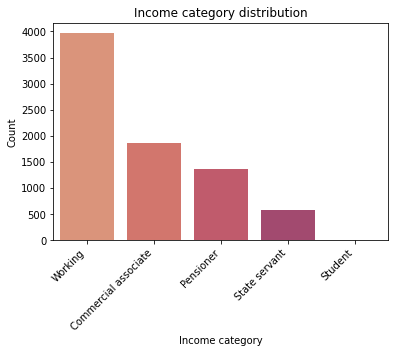

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=application_train_copy['Income category'].value_counts().index,y=application_train_copy['Income category'].value_counts().values,palette=sns.color_palette("flare"))
plt.xlabel("Income category")
plt.xticks(rotation=45,ha='right')
plt.ylabel("Count")
plt.title('Income category distribution')
plt.show()

#### High risk individuals grouped by their Income category

In [ ]:
application_train_copy.groupby('Income category')['Is high risk'].sum()

Income category
Commercial associate    32
Pensioner               48
State servant            9
Student                  0
Working                 74
Name: Is high risk, dtype: int64

In [ ]:
is_high_risk_ic_grp_count = application_train_copy.groupby('Income category')['Is high risk'].sum()

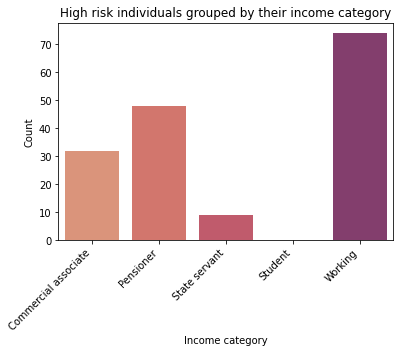

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=is_high_risk_ic_grp_count.index,y=is_high_risk_ic_grp_count.values,palette=sns.color_palette("flare"))
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.title('High risk individuals grouped by their income category')
plt.show()

#### 10. Education level

In [ ]:
application_train_copy['Education level'].describe()

count                              7767
unique                                5
top       Secondary / secondary special
freq                               5396
Name: Education level, dtype: object

In [ ]:
application_train_copy['Education level'].unique()

array(['Secondary / secondary special', 'Incomplete higher',
       'Higher education', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
application_train_copy['Education level'].value_counts()

Secondary / secondary special    5396
Higher education                 1982
Incomplete higher                 291
Lower secondary                    92
Academic degree                     6
Name: Education level, dtype: int64

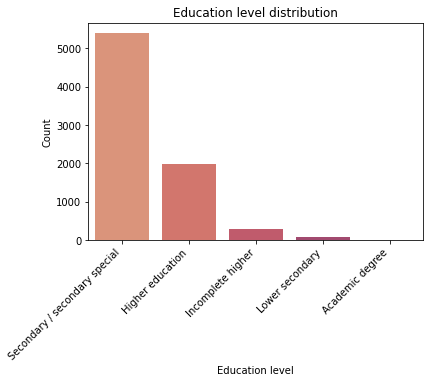

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=application_train_copy['Education level'].value_counts().index,y=application_train_copy['Education level'].value_counts().values,palette=sns.color_palette("flare"))
ax.set_xticklabels(labels=application_train_copy['Education level'].value_counts().index.to_list(),rotation=45,ha='right')
plt.xlabel("Education level")
plt.ylabel("Count")
plt.title('Education level distribution')
plt.show()

#### 11. Days since employment (positive means unemployed)

In [ ]:
application_train_copy['Days since employment (positive means unemployed)'].describe()

count     7767.00000
mean     61081.44650
std     139096.96112
min     -15713.00000
25%      -3000.50000
50%      -1376.00000
75%       -344.00000
max     365243.00000
Name: Days since employment (positive means unemployed), dtype: float64

#### Days since employment distribution

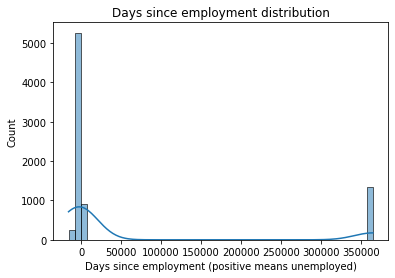

In [ ]:
sns.histplot(data=application_train_copy["Days since employment (positive means unemployed)"],bins=50,kde=True)
plt.title('Days since employment distribution')
plt.show()

In [ ]:
days_since_employment_no_ret = application_train_copy["Days since employment (positive means unemployed)"][application_train_copy["Days since employment (positive means unemployed)"] != 365243]

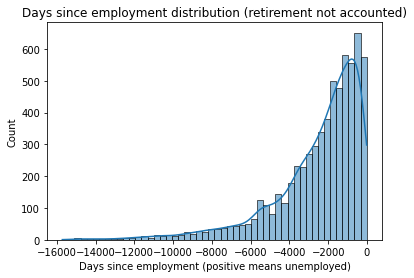

In [ ]:
sns.histplot(data=days_since_employment_no_ret,bins=50,kde=True)
plt.title('Days since employment distribution (retirement not accounted)')
plt.show()

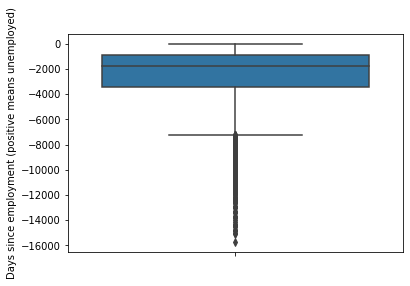

In [ ]:
sns.boxplot(y=days_since_employment_no_ret)
plt.show()

#### 12. Has a car

In [ ]:
application_train_copy['Has a car'].describe()

count     7767
unique       2
top          N
freq      4910
Name: Has a car, dtype: object

In [ ]:
application_train_copy['Has a car'].value_counts()

N    4910
Y    2857
Name: Has a car, dtype: int64

In [ ]:
application_train_copy['Has a car'].value_counts(normalize=True) * 100

N   63.21617
Y   36.78383
Name: Has a car, dtype: float64

#### Car ownership ratio

In [ ]:
size_car_own = application_train_copy['Has a car'].value_counts().values
size_car_own

array([4910, 2857])

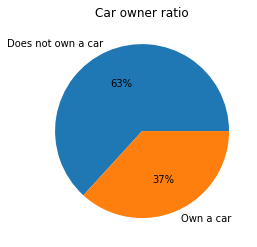

In [ ]:
plt.pie(size_car_own,labels=["Does not own a car","Own a car"],autopct='%1.0f%%')
plt.title('Car owner ratio')
plt.show()

#### Car ownership count

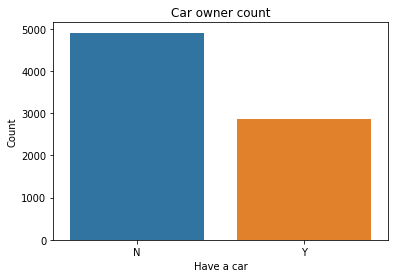

In [ ]:
sns.barplot(x=application_train_copy['Has a car'].value_counts().index,y=size_car_own)
plt.xlabel("Have a car")
plt.ylabel("Count")
plt.title('Car owner count')
plt.show()

#### 13. Has a property

In [ ]:
application_train_copy['Has a property'].describe()

count     7767
unique       2
top          Y
freq      5242
Name: Has a property, dtype: object

In [ ]:
application_train_copy['Has a property'].value_counts()

Y    5242
N    2525
Name: Has a property, dtype: int64

In [ ]:
application_train_copy['Has a property'].value_counts(normalize=True) * 100

Y   67.49067
N   32.50933
Name: Has a property, dtype: float64

#### Property ownership ratio

In [ ]:
size_prop_own = application_train_copy['Has a property'].value_counts().values
size_prop_own

array([5242, 2525])

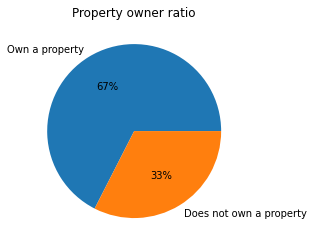

In [ ]:
plt.pie(size_prop_own,labels=["Own a property", "Does not own a property"],autopct='%1.0f%%')
plt.title('Property owner ratio')
plt.show()

#### Property ownership count

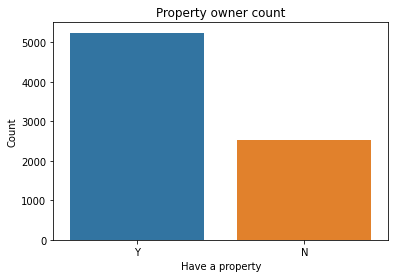

In [ ]:
sns.barplot(x=application_train_copy['Has a property'].value_counts().index,y=size_prop_own)
plt.xlabel("Have a property")
plt.ylabel("Count")
plt.title('Property owner count')
plt.show()

#### 14. Has a work phone

In [ ]:
application_train_copy['Has a work phone'].describe()

count   7767.00000
mean       0.21501
std        0.41086
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        1.00000
Name: Has a work phone, dtype: float64

In [ ]:
application_train_copy['Has a work phone'].value_counts()

0    6097
1    1670
Name: Has a work phone, dtype: int64

In [ ]:
application_train_copy['Has a work phone'].value_counts(normalize=True) * 100

0   78.49878
1   21.50122
Name: Has a work phone, dtype: float64

#### Work phone ownership ratio

In [ ]:
size_work_phone = application_train_copy['Has a work phone'].value_counts().values
size_work_phone

array([6097, 1670])

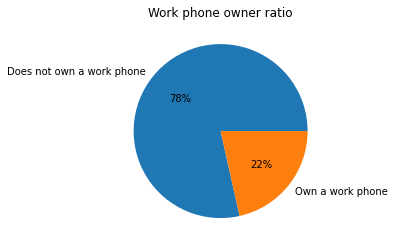

In [ ]:
plt.pie(size_work_phone,labels=["Does not own a work phone","Own a work phone"],autopct='%1.0f%%')
plt.title('Work phone owner ratio')
plt.show()

#### Work phone  ownership count

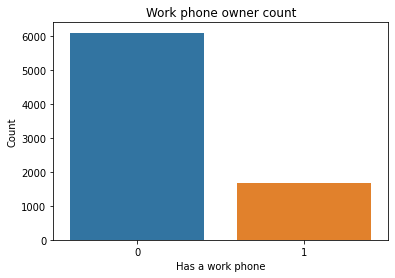

In [ ]:
sns.barplot(x=application_train_copy['Has a work phone'].value_counts().index,y=size_work_phone)
plt.xlabel("Has a work phone")
plt.ylabel("Count")
plt.title('Work phone owner count')
plt.show()

#### 15. Has a mobile phone

In [ ]:
application_train_copy['Has a mobile phone']

6814    1
4745    1
516     1
7397    1
8107    1
       ..
7183    1
8615    1
5989    1
4833    1
9340    1
Name: Has a mobile phone, Length: 7767, dtype: int64

In [ ]:
application_train_copy['Has a mobile phone'].unique()

array([1])

In [ ]:
application_train_copy['Has a mobile phone'].value_counts()

1    7767
Name: Has a mobile phone, dtype: int64

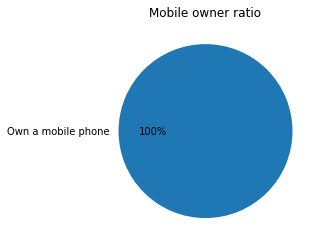

In [ ]:
size_mobile_own = application_train_copy['Has a mobile phone'].value_counts().values
size_mobile_own
plt.pie(size_mobile_own,labels=["Own a mobile phone"],autopct='%1.0f%%')
plt.title('Mobile owner ratio')
plt.show()

#### 16. Has a phone

In [ ]:
application_train_copy['Has a phone'].value_counts(normalize=True) * 100

0   71.18579
1   28.81421
Name: Has a phone, dtype: float64

#### Phone ownership ratio

In [ ]:
size_phone_own = application_train_copy['Has a phone'].value_counts().values
size_phone_own

array([5529, 2238])

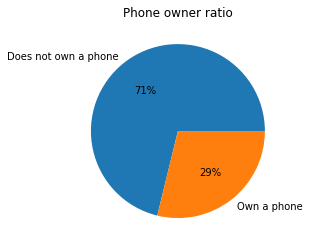

In [ ]:
plt.pie(size_phone_own,labels=["Does not own a phone","Own a phone"],autopct='%1.0f%%')
plt.title('Phone owner ratio')
plt.show()

#### Phone ownership count

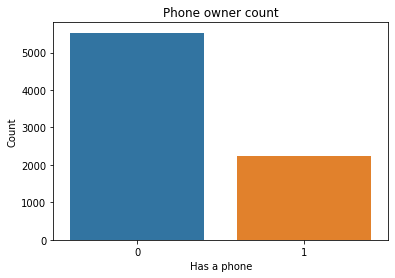

In [ ]:
sns.barplot(x=application_train_copy['Has a phone'].value_counts().index,y=size_phone_own)
plt.xlabel("Has a phone")
plt.ylabel("Count")
plt.title('Phone owner count')
plt.show()

#### 17. Has an email

In [ ]:
application_train_copy['Has an email'].value_counts()

0    7090
1     677
Name: Has an email, dtype: int64

In [ ]:
application_train_copy['Has an email'].value_counts()

0    7090
1     677
Name: Has an email, dtype: int64

In [ ]:
application_train_copy['Has an email'].value_counts(normalize=True) * 100

0   91.28364
1    8.71636
Name: Has an email, dtype: float64

#### Email ownership ratio

In [ ]:
size_email_own = application_train_copy['Has an email'].value_counts().values
size_email_own

array([7090,  677])

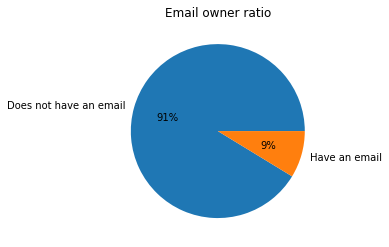

In [ ]:
plt.pie(size_email_own,labels=["Does not have an email","Have an email"],autopct='%1.0f%%')
plt.title('Email owner ratio')
plt.show()

#### Email ownership count

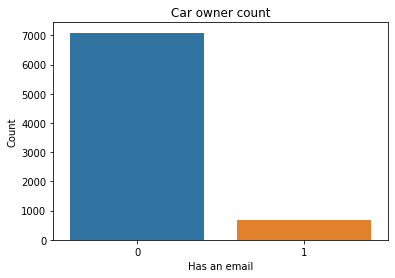

In [ ]:
sns.barplot(x=application_train_copy['Has an email'].value_counts().index,y=size_email_own)
plt.xlabel("Has an email")
plt.ylabel("Count")
plt.title('Car owner count')
plt.show()

#### 4. For supervised learning tasks, identify the target attribute(s).

The target 'Is high risk'

#### Target analysis

In [ ]:
high_risk_count = application_train_copy['Is high risk'].value_counts()
high_risk_count 

0    7604
1     163
Name: Is high risk, dtype: int64

In [ ]:
high_risk_ratio = application_train_copy['Is high risk'].value_counts(normalize=True) * 100
high_risk_ratio 

0   97.90138
1    2.09862
Name: Is high risk, dtype: float64

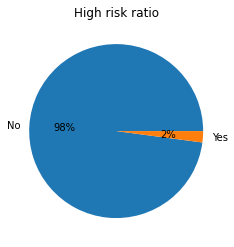

In [ ]:
plt.pie(high_risk_ratio,labels=["No","Yes"],autopct='%1.0f%%')
plt.title('High risk ratio')
plt.show()

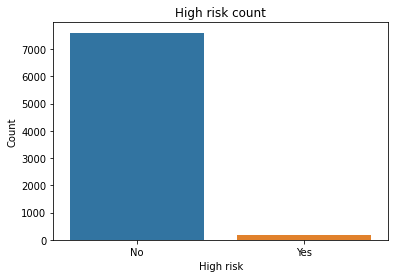

In [ ]:
fig, ax = plt.subplots()
sns.barplot(x=high_risk_count.index,y=high_risk_count.values)
ax.set_xticklabels(['No','Yes'])
plt.xlabel("High risk")
plt.ylabel("Count")
plt.title('High risk count')
plt.show()

#### 5. Visualize the correlation within the data.

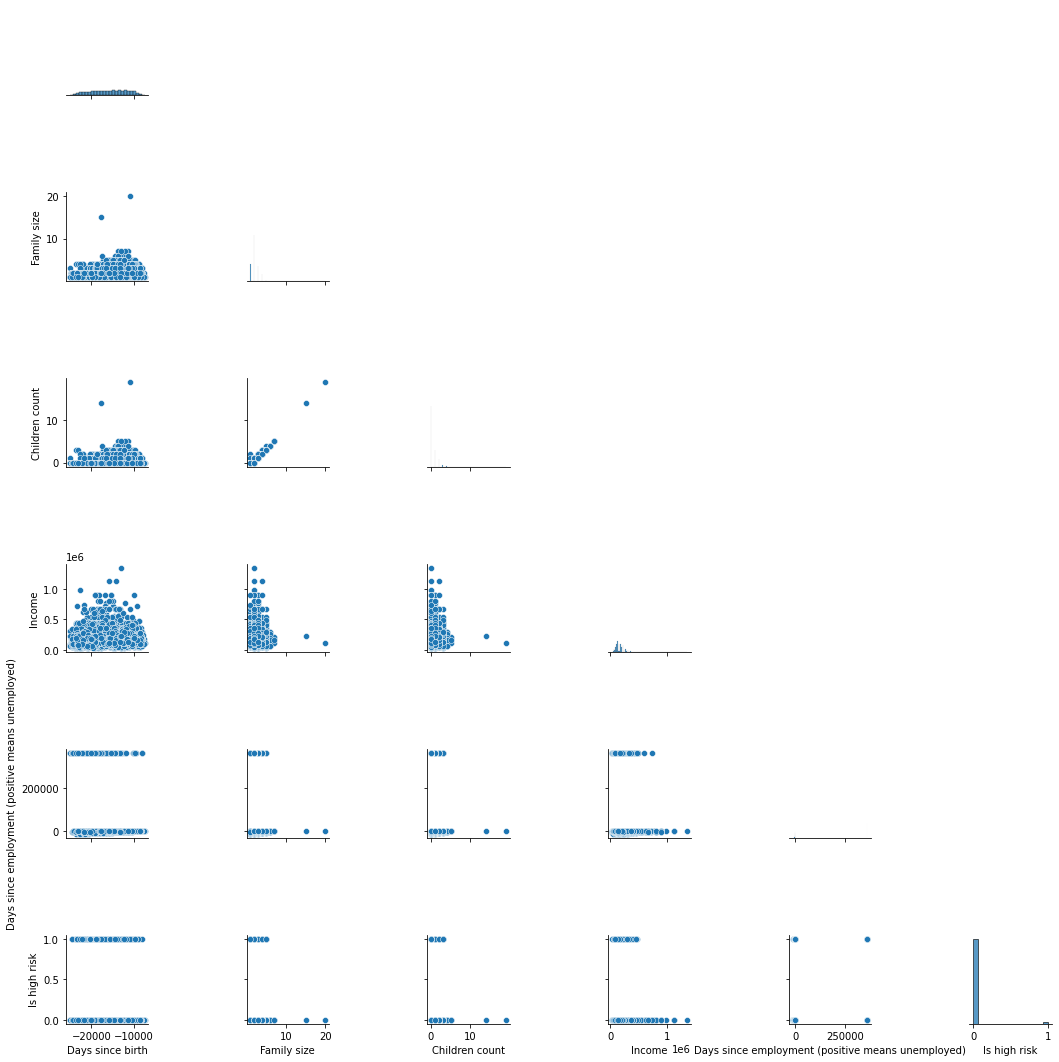

In [ ]:
sns.pairplot(application_train_copy[['Days since birth','Family size','Children count','Income','Days since employment (positive means unemployed)','Is high risk']],corner=True)
plt.show()

In [ ]:
app_corr_matrix = application_train_copy.corr()
app_corr_matrix

,Days since birth,Family size,Children count,Income,Days since employment (positive means unemployed),Has a mobile phone,Has a work phone,Has a phone,Has an email,Is high risk
Days since birth,1.00000,0.27780,0.32454,0.06965,-0.61122,nan,0.18245,-0.04612,0.10934,-0.01013
Family size,0.27780,1.00000,0.89199,0.03309,-0.21325,nan,0.07074,-0.00810,0.00883,-0.00459
Children count,0.32454,0.89199,1.00000,0.03501,-0.22218,nan,0.05963,-0.02180,0.01506,0.01107
Income,0.06965,0.03309,0.03501,1.00000,-0.17693,nan,-0.02950,0.02235,0.09982,0.00080
Days since employment (positive means unemployed),-0.61122,-0.21325,-0.22218,-0.17693,1.00000,nan,-0.23933,0.00085,-0.08636,0.01418
Has a mobile phone,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Has a work phone,0.18245,0.07074,0.05963,-0.02950,-0.23933,nan,1.00000,0.29256,-0.03618,-0.00666
Has a phone,-0.04612,-0.00810,-0.02180,0.02235,0.00085,nan,0.29256,1.00000,0.00900,0.00800
Has an email,0.10934,0.00883,0.01506,0.09982,-0.08636,nan,-0.03618,0.00900,1.00000,-0.01340
Is high risk,-0.01013,-0.00459,0.01107,0.00080,0.01418,nan,-0.00666,0.00800,-0.01340,1.00000


In [ ]:
mask = np.zeros_like(app_corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
app_corr_matrix[mask] = np.nan
(app_corr_matrix
 .style
 .background_gradient(cmap='bwr', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  
)

,Days since birth,Family size,Children count,Income,Days since employment (positive means unemployed),Has a mobile phone,Has a work phone,Has a phone,Has an email,Is high risk
Days since birth,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Family size,0.277797,nan,nan,nan,nan,nan,nan,nan,nan,nan
Children count,0.324537,0.891989,nan,nan,nan,nan,nan,nan,nan,nan
Income,0.069647,0.033090,0.035015,nan,nan,nan,nan,nan,nan,nan
Days since employment (positive means unemployed),-0.611224,-0.213251,-0.222181,-0.176926,nan,nan,nan,nan,nan,nan
Has a mobile phone,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Has a work phone,0.182448,0.070739,0.059628,-0.029497,-0.239329,nan,nan,nan,nan,nan
Has a phone,-0.046116,-0.008099,-0.021802,0.022347,0.000847,nan,0.292564,nan,nan,nan
Has an email,0.109335,0.008829,0.015056,0.099817,-0.086356,nan,-0.036178,0.008998,nan,nan
Is high risk,-0.010130,-0.004587,0.011071,0.000799,0.014183,nan,-0.006662,0.007998,-0.013399,nan


#### 6. Study the correlations between attributes.

#### 6.1 Family size vs Children count

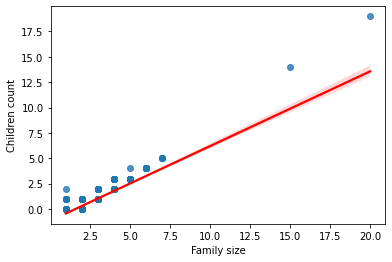

In [ ]:
sns.regplot(x=application_train_copy['Family size'],y=application_train_copy['Children count'],line_kws={"color": "red"})
plt.show()

#### Days since birth vs Days since employment

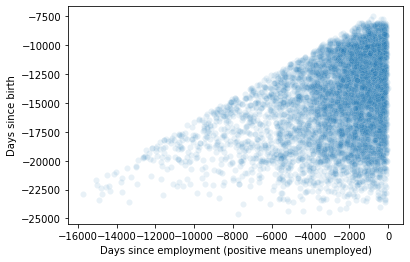

In [ ]:
sns.scatterplot(x=application_train_copy['Days since employment (positive means unemployed)'][application_train_copy['Days since employment (positive means unemployed)'] != 365243],y=application_train_copy['Days since birth'],alpha=.1)
plt.show()

#### 7. Study how you would solve the problem manually.

Consult expert subject matter in credit scoring

#### 8. Identify the promising transformations you may want to apply.

Transformation to do:

    - Encoding: Label encoding for sex
    - Encoding: Label encoding for Marital Status
    - Encoding: Label encoding for Way of living
    - Encoding: Label encoding for Occupation
    - Encoding: Label encoding for Has a car
    - Encoding: Label encoding for Has a property
    - Encoding: Label encoding for Income Category
    - Encoding: Label encoding for Education
    
    - Custom Transformation: Detect and remove outliers
    - Custom Transformation: Remove missing data
    - Custom Transformation: Balance the data in pipeline
    - Custom Transformation: Change to absolute value and divide the Days since birth by 365.25
    - Custom Transformation: Change name Days since birth to Age
    - Custom Transformation: Change to absolute value and divide the Days since employment by 365.25
    - Custom Transformation: Change name Days since employment to Experience length
    - Custom Transformation: Drop has mobile phone
    - Customer Transformation: Balance the skewed data income column, age, experience length
   
        ** Toggle and check with model perfomance
    - Custom Transformation: Keep Family size and drop Children count 
    - Custom Transformation: Keep Children count and drop Family size
    - Custom Transformation: Keep/drop the occupation column
    - Custom Transformation: Use Days of employment as part of the outliers column
    
    
    - Scalling: Min-max for Age
    - Scalling: Min-max for income
    - Scalling: Min-max for Experience   
    
    
    - Imputation: Impute Occupation
   
    - Oversample with SMOTE after encoding before modelling  

#### 9. Identify extra data that would be useful (go back to “Get the Data”).

Not applicable

#### 10. Document what you have learned.

Refer to the report

### Prepare the Data

#### 1. Data Cleaning

#### 1.1 Custom transformer to handle outliers

In [ ]:
class OutlierExtractor(BaseEstimator, TransformerMixin):
    def __init__(self,add_days_employed_to_col=False,outlier_col = ['Family size','Children count','Income']):
        self.outlier_col = outlier_col
        self.add_days_employed_to_col = add_days_employed_to_col
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        outlier_col = []
        def outlier_cal(outlier_col):
            Q1 = X[self.outlier_col].quantile(.25)
            Q3 = X[self.outlier_col].quantile(.75)
            IQR = Q3 - Q1
            outlier_condition = (X[self.outlier_col] < (Q1 - 1.5 * IQR)) | (X[self.outlier_col] > (Q3 + 1.5 * IQR))
            index_to_keep = X[~outlier_condition.any(axis=1)].index
            return X.loc[index_to_keep]
        if self.add_days_employed_to_col:
            self.outlier_col.append('Days since employment (positive means unemployed)')
            return outlier_cal(self.outlier_col)
        else:
            if len(self.outlier_col) == 3:
                return outlier_cal(self.outlier_col)
            else:
                self.outlier_col.remove('Days since employment (positive means unemployed)')
                return outlier_cal(self.outlier_col)

In [ ]:
outlier_remover = OutlierExtractor()

#### 1.2 Custom transformer to handle missing value

In [ ]:
application_train_copy[application_train_copy['Days since employment (positive means unemployed)'] == 365243]['Occupation']

1882    NaN
24      NaN
3497    NaN
8453    NaN
2504    NaN
       ... 
2058    NaN
3990    NaN
1610    NaN
3604    NaN
4833    NaN
Name: Occupation, Length: 1343, dtype: object

In [ ]:
application_train["Occupation"].value_counts()

Laborers                 1400
Sales staff               739
Core staff                716
Managers                  628
Drivers                   504
High skill tech staff     289
Accountants               243
Medicine staff            227
Cooking staff             150
Security staff            143
Cleaning staff            115
Private service staff      71
Low-skill Laborers         42
Secretaries                42
Waiters/barmen staff       33
HR staff                   17
IT staff                   13
Realty agents              10
Name: Occupation, dtype: int64

In [ ]:
class MissingValHandler(BaseEstimator, TransformerMixin):
    def __init__(self,drop_occupation=False):
        self.drop_occupation = drop_occupation
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        if self.drop_occupation:
            X_no_occ = X.drop("Occupation",axis=1)
            return X_no_occ
        else:
            nan_pensioner = X[X['Days since employment (positive means unemployed)'] == 365243]['Occupation']
            nan_pensioner_idx = X.loc[nan_pensioner.index.to_list()]['Occupation'].index.to_list()
            X.at[nan_pensioner_idx,'Occupation'] = 'Retired'
            #rest of nan other than the ones related to the retiment situation
            rest_nan_idx = X['Occupation'][X['Occupation'].isna()].index.to_list()
            most_freq_occ = X['Occupation'].value_counts().index[0]
            X['Occupation'].loc[rest_nan_idx] = most_freq_occ
            return X

#### 2. Feature selection

In [ ]:
application_train_copy = application_train.copy()

In [ ]:
class ColumnsToDrop(BaseEstimator,TransformerMixin):
    def __init__(self,column_to_drop = []):
        self.column_to_drop = column_to_drop
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        if (set(self.column_to_drop).issubset(X.columns)):
                self.column_to_drop.append('Has a mobile phone')
                X.drop(self.column_to_drop,axis=1,inplace=True)
                return X
        else:
            if (set('Has a mobile phone').issubset(X.columns)):
                X.drop('Has a mobile phone',axis=1,inplace=True)
                return X
            else:
                return X

In [ ]:
feat_selector = ColumnsToDrop()

#### 3. Feature engineering

#### 3.1 Days transformation

In [ ]:
class DaysTransformation(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.days_col = ['Days since birth','Days since employment (positive means unemployed)']
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        if (set(self.days_col).issubset(X.columns)):
            for col in self.days_col:
                if col == 'Days since birth':
                    X['Age'] = np.abs(X[col])/365.25
                    X.drop(col,axis=1,inplace=True)
                elif col == 'Days since employment (positive means unemployed)':
                    X[col] = np.abs(X[col])/365.25
                    X[X[col] == 999.980][col] = -1
                    X['Employment lenght (in years)'] = X[col]
                    X.drop(col,axis=1,inplace=True)
            return X
        else:
            return X

In [ ]:
day_col_est = DaysTransformation()

#### 3.2 Family children column drop

In [ ]:
class FamilyChildrenColToggle(BaseEstimator,TransformerMixin):
    def __init__(self, drop_family_col = False, drop_child_col = False):
        self.drop_family_col = drop_family_col
        self.drop_child_col = drop_child_col
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        if self.drop_family_col & ('Family size' in X.columns):
            X.drop('Family size',axis=1,inplace=True) 
            return X 
        elif self.drop_child_col & ('Children count' in X.columns):
            X.drop('Children count',axis=1,inplace=True) 
            return X
        else:
            return X        

#### 3.3 Oversampling with SMOTE

In [ ]:
class OversampleSMOTE(BaseEstimator,TransformerMixin):
    def __init__(self, perform_oversampling = True):
        self.perform_oversampling = perform_oversampling
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        if self.perform_oversampling:
            smote = SMOTE()
            X_bal, y_bal = smote.fit_resample(X[:,:-1],X[:,-1])
            X_y_bal = np.concatenate((X_bal,y_bal[:,None]),axis=1)
            return X_y_bal

        else:
            return X

#### 3.4 Target transformation column 

In [ ]:
class TargetColTransformation(BaseEstimator,TransformerMixin):
    def __init__(self,target_pos_change = False,target_drop = False):
        self.target_pos_change = target_pos_change
        self.target_drop = target_drop
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        if self.target_drop:
            if self.target_pos_change == False:
                X_col_list = X.columns.to_list()
                X_col_list.remove('Is high risk')
                X = X[X_col_list]
                return X
            else:
                print('Cant change the position of the target while it was dropped')
                return X
        else:
            if self.target_pos_change:
                X_col_list = X.columns.to_list()
                X_col_list.remove('Is high risk')
                X_col_list.append('Is high risk')
                X = X[X_col_list]
                return X
            else:
                return X

#### 4. Feature scaling

Implemented with Column Transformer, but we will create a feature selector for selection the column to be scaled

#### 5. Put everything together in a column transformer/pipeline

In [ ]:
application_train_copy = application_train.copy()
application_test_copy = application_test.copy()

In [ ]:
def full_pipeline(df,type_dataframe):
    #columns to use in the column transformer
    enc_columns = ['Sex','Marital status','Way of living','Occupation','Has a car','Has a property','Income category','Education level']
    scale_columns = ['Age','Income','Employment lenght (in years)']

    #pipeline 
    if type_dataframe == 'Train':
        pipeline = Pipeline([
        ('imputer_missing',MissingValHandler()), #Has toggle option
         ('outlier',OutlierExtractor()), #Has toggle option
         ('feat_select',ColumnsToDrop()), #Has toggle option
         ('day_trans',DaysTransformation()),
         ('family_chil_trans',FamilyChildrenColToggle()), #Has toggle option
         ('y_trans',TargetColTransformation(target_pos_change = True))
        ])
        #Column transformer
        col_transformer = ColumnTransformer([
         ('encoder',OrdinalEncoder(),enc_columns),
         ('scaler',MinMaxScaler(),scale_columns),], remainder='passthrough')

    #     #pipeline for SMOTE
        pipeline_smote = Pipeline([
         ('smote',OversampleSMOTE())
         ])
    elif type_dataframe == 'Test':
        pipeline = Pipeline([
        ('imputer_missing',MissingValHandler()), #Has toggle option
        ('outlier',OutlierExtractor()), #Has toggle option
        ('feat_select',ColumnsToDrop()), #Has toggle option
        ('day_trans',DaysTransformation()),
        ('family_chil_trans',FamilyChildrenColToggle()), #Has toggle option
        # drop the target to avoid data snooping
        ('y_trans',TargetColTransformation(target_drop=True))
        ])
              #Column transformer
        col_transformer = ColumnTransformer([
        ('encoder',OrdinalEncoder(),enc_columns),
        ('scaler',MinMaxScaler(),scale_columns),], remainder='passthrough')

        #pipeline for SMOTE
        pipeline_smote = Pipeline([
        ('smote',OversampleSMOTE())
        ])

    
    
    if type_dataframe == 'Train':
        df_pip = pipeline.fit_transform(df)
        df_prepared = col_transformer.fit_transform(df_pip)
        df_bal = pipeline_smote.fit_transform(df_prepared)
        X_prep = df_bal[:,:-1]
        y_prep = df_bal[:,-1]
        return X_prep, y_prep
    # ToDo: Finish the test 
    elif type_dataframe == 'Test':
        df_pip = pipeline.transform(df)
        print(df_pip.columns)
        df_prepared = col_transformer.transform(df_pip)
        print(df_prepared.shape)
#         df_bal = pipeline_smote.transform(df_prepared)
#         print(df_bal.shape)
    else:
        print('Please select "Train" or "Test" for type_dataframe')

In [ ]:
X_train_prep, y_train_prep = full_pipeline(application_train_copy, 'Train')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_prep.shape

(14496, 16)

In [ ]:
y_train_prep.shape

(14496,)

### Shortlist Promising Models

In [ ]:
def fit_evaluate_model(model,X_train_prep,y_train_prep,cross_val = False):
    
    if cross_val:
        score_list = ['precision','recall','f1','accuracy','roc_auc']
        for score in score_list:
            scores = cross_val_score(model,X_train_prep,y_train_prep,scoring=score,cv=10)
            print('\n                        {} Score\n'.format(score))
            print('All the scores: {}'.format(scores))
            print('Mean of the scores: {}'.format(scores.mean()))
            print('Standard deviation: {}'.format(scores.std()))
            print('\n*****************************************************\n')
        
    else:
        model.fit(X_train_prep, y_train_prep)
        y_train_prediction = model.predict(X_train_prep)

        print('                        Classification Report')
        print(classification_report(y_train_prep,y_train_prediction))
        print('*****************************************************')

        print('Accuracy score {}'.format(accuracy_score(y_train_prep,y_train_prediction)))
        print('Confusion Matrix')
        plot_confusion_matrix(model,X_train_prep,y_train_prep)
        plt.show()
        print('*****************************************************')

        no_risk_probs = [0 for _ in range(len(y_train_prep))]
        risk_probs = model.predict_proba(X_train_prep)
        risk_probs_pos_outcome = risk_probs[:,1]
        no_risk_auc = roc_auc_score(y_train_prep,no_risk_probs)
        risk_auc = roc_auc_score(y_train_prep,risk_probs_pos_outcome)
        print('No risk: ROC AUC=%.3f' % (no_risk_auc))
        print('High risk: ROC AUC=%.3f' % (risk_auc))
        no_risk_false_pos_rate, no_risk_true_pos_rate, _ = roc_curve(y_train_prep,no_risk_probs)
        risk_false_pos_rate, risk_true_pos_rate, _ = roc_curve(y_train_prep,risk_probs_pos_outcome)
        plt.plot(no_risk_false_pos_rate, no_risk_true_pos_rate, linestyle='--', label='No risk')
        plt.plot(risk_false_pos_rate, risk_true_pos_rate, marker='.', label='High risk')
        # axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()

#### 1. Quick models comparison

#### 1.1 Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

                        Classification Report
              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62      7248
         1.0       0.62      0.60      0.61      7248

    accuracy                           0.61     14496
   macro avg       0.61      0.61      0.61     14496
weighted avg       0.61      0.61      0.61     14496

*****************************************************
Accuracy score 0.6130656732891833
Confusion Matrix


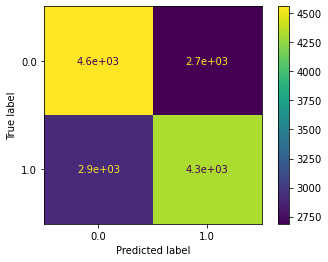

*****************************************************
No risk: ROC AUC=0.500
High risk: ROC AUC=0.665


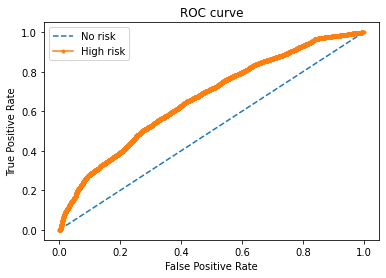

In [ ]:
fit_evaluate_model(log_reg,X_train_prep,y_train_prep)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#### 1.2. Support Vector Machines

In [ ]:
svc_model = SVC(probability=True)

                        Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.67      0.71      7248
         1.0       0.71      0.80      0.75      7248

    accuracy                           0.73     14496
   macro avg       0.74      0.73      0.73     14496
weighted avg       0.74      0.73      0.73     14496

*****************************************************
Accuracy score 0.7339955849889624
Confusion Matrix


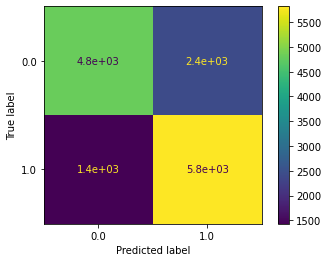

*****************************************************
No risk: ROC AUC=0.500
High risk: ROC AUC=0.821


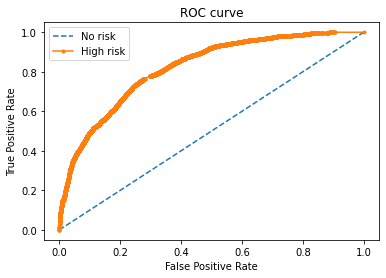

In [ ]:
fit_evaluate_model(svc_model,X_train_prep,y_train_prep)

#### Hyperparameter tuning SVM

In [ ]:
param_grid = {'C': [0.1,1, 10, 100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
rand_search = RandomizedSearchCV(svc_model,param_grid, refit=True,cv=5,scoring='accuracy',n_jobs=-1,return_train_score=True,verbose=2)

In [ ]:
rand_search.fit(X_train_prep,y_train_prep)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 21.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=True, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
rand_search.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
rand_search.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

#### 1.3. Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier()

                        Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7248
         1.0       1.00      1.00      1.00      7248

    accuracy                           1.00     14496
   macro avg       1.00      1.00      1.00     14496
weighted avg       1.00      1.00      1.00     14496

*****************************************************
Accuracy score 1.0
Confusion Matrix


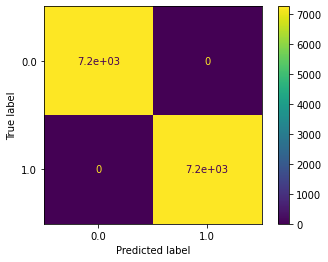

*****************************************************
No risk: ROC AUC=0.500
High risk: ROC AUC=1.000


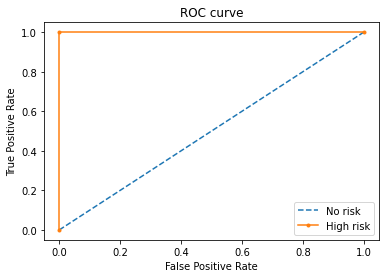

In [ ]:
fit_evaluate_model(dt_clf,X_train_prep,y_train_prep)

#### * K-fold cross-validation 

In [ ]:
fit_evaluate_model(dt_clf,X_train_prep,y_train_prep,has_overfitted=True)


                        precision Score

All the scores: [0.98178808 0.97544338 0.96380697 0.95989305 0.96635262 0.9486166
 0.96246649 0.96912752 0.96216216 0.96380697]
Mean of the scores: 0.9653463844135525
Standard deviation: 0.008487552103899655

*****************************************************


                        recall Score

All the scores: [0.8121547  0.98756906 0.99171271 0.99171271 0.99171271 0.99447514
 0.99171271 0.99723757 0.98755187 0.99309392]
Mean of the scores: 0.9738933082689532
Standard deviation: 0.05398176991373403

*****************************************************


                        f1 Score

All the scores: [0.8897281  0.98076923 0.97750511 0.9795082  0.98020478 0.97162162
 0.97753574 0.98362892 0.97271487 0.98090041]
Mean of the scores: 0.969411697692798
Standard deviation: 0.02679238285735543

*****************************************************


                        accuracy Score

All the scores: [0.89502762 0.98135359 0.97859116 0.

#### * Hyperparameters tuning

In [ ]:
param_grid = [
    {
    'max_depth':[2,3,4,6,8,10,12,15,20], 
    'min_samples_leaf':[1,2,4,6,8,10,20,30],
    'min_samples_split':[1,2,3,4,5,6,8,10]
    }
]

In [ ]:
grid_search = GridSearchCV(dt_clf,param_grid,cv=10,scoring='accuracy',n_jobs=-1,return_train_score=True)

In [ ]:
grid_search.fit(X_train_prep,y_train_prep)

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/Users/semasuka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit fail

KeyboardInterrupt: 

#### * Cost-complexity pruning

In [ ]:
path = dt_clf.cost_complexity_pruning_path(X_train_prep, y_train_prep)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.00000000e+00, 3.43109025e-05, 3.43795930e-05, 4.23631257e-05,
       4.44023444e-05, 4.45119799e-05, 4.49760181e-05, 4.52246101e-05,
       4.52920089e-05, 4.54853285e-05, 4.57203021e-05, 4.57357482e-05,
       4.57357482e-05, 4.57775957e-05, 4.60468757e-05, 4.68267952e-05,
       5.18027352e-05, 5.24699678e-05, 5.41511258e-05, 5.42423747e-05,
       5.47446189e-05, 5.49400738e-05, 5.52562509e-05, 5.90365130e-05,
       6.04365244e-05, 6.13958343e-05, 6.13958343e-05, 6.20063042e-05,
       6.27911942e-05, 6.27911942e-05, 6.27911942e-05, 6.33144541e-05,
       6.33144541e-05, 6.41367198e-05, 6.44656260e-05, 6.44656260e-05,
       6.54350339e-05, 6.54977112e-05, 6.56167979e-05, 6.56935427e-05,
       6.57812510e-05, 6.61520845e-05, 6.61923838e-05, 6.63075010e-05,
       6.63075010e-05, 6.64137631e-05, 6.64137631e-05, 6.64137631e-05,
       6.65121538e-05, 6.65121538e-05, 6.66035167e-05, 6.66035167e-05,
       6.66035167e-05, 6.66885786e-05, 6.69772738e-05, 6.71516938e-05,
      

In [ ]:
acc_train = []
acc_test = []

for val in ccp_alphas:
  dt_clf = DecisionTreeClassifier(ccp_alpha=val, random_state=42)
  dt_clf.fit(X_train_prep, y_train_prep)
  y_train_pred = dt_clf.predict(X_train_prep) # Predictions
  y_true = y_test # True values
  acc_train.append(accuracy_score(y_train, dtclf.predict(X_train)))
  acc_test.append(accuracy_score(y_true, y_pred))

#### 1.4. Random Forests

In [ ]:
rf_clf = RandomForestClassifier()

                        Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7248
         1.0       1.00      1.00      1.00      7248

    accuracy                           1.00     14496
   macro avg       1.00      1.00      1.00     14496
weighted avg       1.00      1.00      1.00     14496

*****************************************************
Accuracy score 1.0
Confusion Matrix


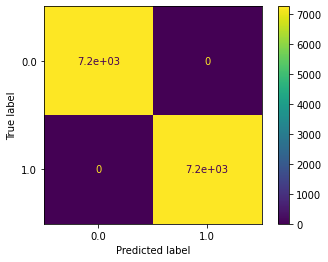

*****************************************************
No risk: ROC AUC=0.500
High risk: ROC AUC=1.000


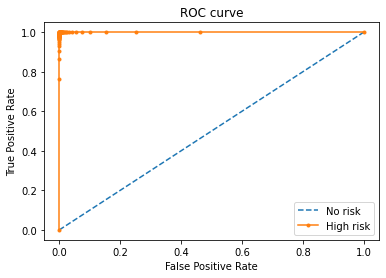

In [ ]:
fit_evaluate_model(rf_clf,X_train_prep,y_train_prep)

#### * K-fold cross validation

In [ ]:
fit_evaluate_model(rf_clf,X_train_prep,y_train_prep,has_overfitted=True)


                        precision Score

All the scores: [0.9933222  0.99587345 0.99176955 0.98905609 0.99313187 0.99724518
 0.99311295 0.99449036 0.99312242 0.99175824]
Mean of the scores: 0.9932882306740328
Standard deviation: 0.00215471678232525

*****************************************************


                        recall Score

All the scores: [0.82320442 1.         0.99861878 0.99861878 0.99861878 1.
 0.99585635 0.99723757 0.99861687 0.99723757]
Mean of the scores: 0.9808009139328917
Standard deviation: 0.05254588114125769

*****************************************************


                        f1 Score

All the scores: [0.89795918 0.99862069 0.99380592 0.99449794 0.99586777 0.99793246
 0.99379738 0.99724138 0.99586207 0.99449036]
Mean of the scores: 0.9860075145329882
Standard deviation: 0.02939368077142649

*****************************************************


                        accuracy Score

All the scores: [0.90745856 0.99792818 0.99447514 0.9944751

#### 1.5. Gaussian Naive Bayes

In [ ]:
GaussianNB_clf = GaussianNB()

                        Classification Report
              precision    recall  f1-score   support

         0.0       0.65      0.43      0.52      7248
         1.0       0.57      0.78      0.66      7248

    accuracy                           0.60     14496
   macro avg       0.61      0.60      0.59     14496
weighted avg       0.61      0.60      0.59     14496

*****************************************************
Accuracy score 0.6004415011037527
Confusion Matrix


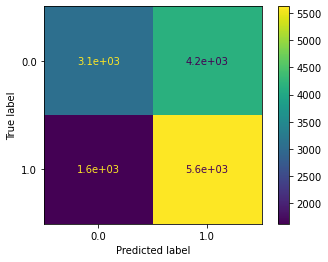

*****************************************************
No risk: ROC AUC=0.500
High risk: ROC AUC=0.670


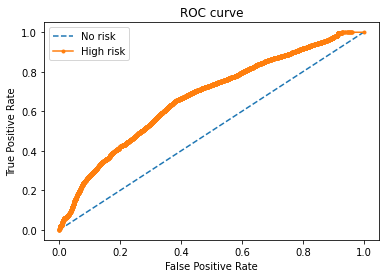

In [ ]:
fit_evaluate_model(GaussianNB_clf,X_train_prep,y_train_prep)

#### * K-fold cross-validation 

In [ ]:
fit_evaluate_model(GaussianNB_clf,X_train_prep,y_train_prep,cross_val=True)


                        precision Score

All the scores: [0.57723577 0.5845666  0.57969432 0.5835141  0.57936508 0.57821553
 0.58585859 0.57002188 0.59131403 0.57658643]
Mean of the scores: 0.5806372330212537
Standard deviation: 0.005603655134676822

*****************************************************


                        recall Score

All the scores: [0.68646409 0.76381215 0.73342541 0.74309392 0.7058011  0.68922652
 0.72099448 0.71961326 0.73443983 0.72790055]
Mean of the scores: 0.7224771325737603
Standard deviation: 0.022620904579179556

*****************************************************


                        f1 Score

All the scores: [0.62712934 0.66227545 0.64756098 0.65370595 0.63636364 0.62885948
 0.64643963 0.63614164 0.65515114 0.64346764]
Mean of the scores: 0.6437094885106982
Standard deviation: 0.010975152526182908

*****************************************************


                        accuracy Score

All the scores: [0.59185083 0.61049724 0.6008287

#### 1.6. KNN

In [ ]:
knn_clf = KNeighborsClassifier()

                        Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      7248
         1.0       0.94      1.00      0.97      7248

    accuracy                           0.97     14496
   macro avg       0.97      0.97      0.97     14496
weighted avg       0.97      0.97      0.97     14496

*****************************************************
Accuracy score 0.9654387417218543
Confusion Matrix


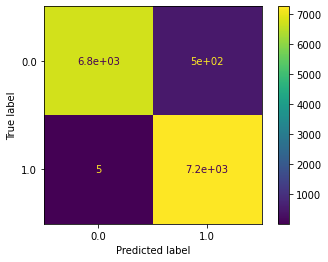

*****************************************************
No risk: ROC AUC=0.500
High risk: ROC AUC=0.999


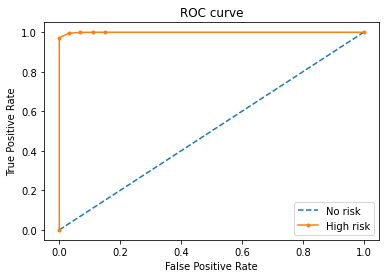

In [ ]:
fit_evaluate_model(knn_clf,X_train_prep,y_train_prep)

#### * K-fold cross-validation 

In [ ]:
fit_evaluate_model(knn_clf,X_train_prep,y_train_prep,cross_val=True)


                        precision Score

All the scores: [0.89813665 0.90601504 0.91012658 0.89162562 0.90125    0.9025
 0.89813665 0.89149199 0.9        0.90350877]
Mean of the scores: 0.9002791284694757
Standard deviation: 0.005545574839321257

*****************************************************


                        recall Score

All the scores: [0.99861878 0.99861878 0.99309392 1.         0.99585635 0.99723757
 0.99861878 0.99861878 0.99585062 0.99585635]
Mean of the scores: 0.9972369959423213
Standard deviation: 0.0019537396201451157

*****************************************************


                        f1 Score

All the scores: [0.94571615 0.9500657  0.94980185 0.94270833 0.94619423 0.94750656
 0.94571615 0.94201954 0.9455023  0.94743758]
Mean of the scores: 0.9462668406059874
Standard deviation: 0.0024846327393278187

*****************************************************


                        accuracy Score

All the scores: [0.94267956 0.94751381 0.94751381 

#### 1.7. Gradient Boosting

In [ ]:
gboost_clf = GradientBoostingClassifier()

                        Classification Report
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      7248
         1.0       1.00      0.94      0.96      7248

    accuracy                           0.97     14496
   macro avg       0.97      0.97      0.97     14496
weighted avg       0.97      0.97      0.97     14496

*****************************************************
Accuracy score 0.9659906181015453
Confusion Matrix


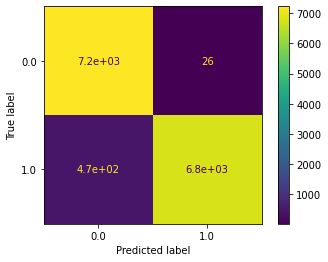

*****************************************************
No risk: ROC AUC=0.500
High risk: ROC AUC=0.994


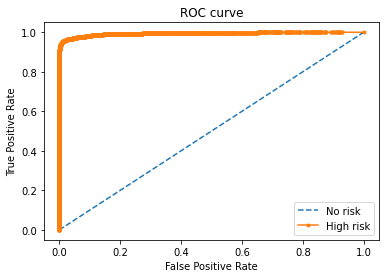

In [ ]:
fit_evaluate_model(gboost_clf,X_train_prep,y_train_prep)

#### * K-fold cross validation

In [ ]:
fit_evaluate_model(gboost_clf,X_train_prep,y_train_prep,has_overfitted=True)


                        precision Score

All the scores: [0.99464286 0.997151   0.98998569 0.99005682 0.98979592 0.99429387
 0.99008499 0.98865248 0.99287749 0.99292786]
Mean of the scores: 0.9920468975794906
Standard deviation: 0.0026067745039222204

*****************************************************


                        recall Score

All the scores: [0.76933702 0.96685083 0.9558011  0.96270718 0.9378453  0.96270718
 0.96546961 0.96270718 0.96403873 0.96961326]
Mean of the scores: 0.9417077401557353
Standard deviation: 0.058070930714140566

*****************************************************


                        f1 Score

All the scores: [0.86760125 0.98176718 0.97259311 0.97619048 0.96312057 0.97824561
 0.97762238 0.97550735 0.97824561 0.98113208]
Mean of the scores: 0.9652025612699111
Standard deviation: 0.03291583952000257

*****************************************************


                        accuracy Score

All the scores: [0.88259669 0.9820442  0.9730663

#### 1.8. Linear Discriminant Analysis

In [ ]:
lda_clf = LinearDiscriminantAnalysis()

                        Classification Report
              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62      7248
         1.0       0.62      0.60      0.61      7248

    accuracy                           0.61     14496
   macro avg       0.61      0.61      0.61     14496
weighted avg       0.61      0.61      0.61     14496

*****************************************************
Accuracy score 0.6131346578366446
Confusion Matrix


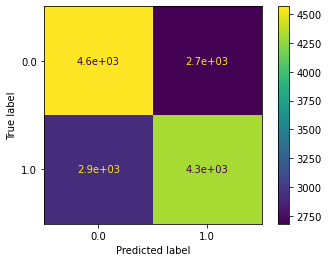

*****************************************************
No risk: ROC AUC=0.500
High risk: ROC AUC=0.665


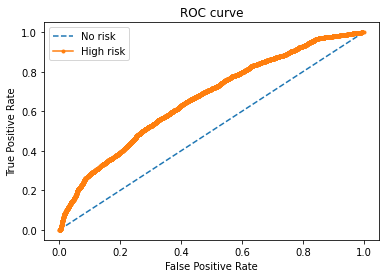

In [ ]:
fit_evaluate_model(lda_clf,X_train_prep,y_train_prep)

#### * K-fold cross-validation 

In [ ]:
fit_evaluate_model(lda_clf,X_train_prep,y_train_prep,cross_val=True)


                        precision Score

All the scores: [0.61111111 0.62278481 0.62318841 0.59491979 0.61825726 0.59308511
 0.59358289 0.62028609 0.60519481 0.58721704]
Mean of the scores: 0.6069627303587317
Standard deviation: 0.013211952474258142

*****************************************************


                        recall Score

All the scores: [0.60773481 0.67955801 0.65331492 0.61464088 0.61740331 0.6160221
 0.61325967 0.65883978 0.64453665 0.60911602]
Mean of the scores: 0.631442615559784
Standard deviation: 0.02413275003638168

*****************************************************


                        f1 Score

All the scores: [0.60941828 0.64993395 0.63789616 0.60461957 0.61782999 0.60433604
 0.60326087 0.63898192 0.62424648 0.5979661 ]
Mean of the scores: 0.6188489360913333
Standard deviation: 0.01716304220105173

*****************************************************


                        accuracy Score

All the scores: [0.61049724 0.6339779  0.62914365 0.

#### 1.9. Bagging

In [ ]:
bgg_clf = BaggingClassifier()

                        Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7248
         1.0       1.00      1.00      1.00      7248

    accuracy                           1.00     14496
   macro avg       1.00      1.00      1.00     14496
weighted avg       1.00      1.00      1.00     14496

*****************************************************
Accuracy score 0.9984823399558499
Confusion Matrix


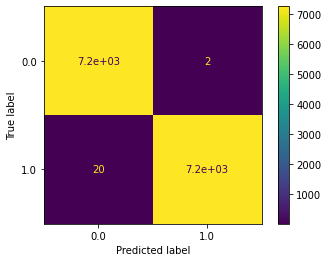

*****************************************************
No risk: ROC AUC=0.500
High risk: ROC AUC=1.000


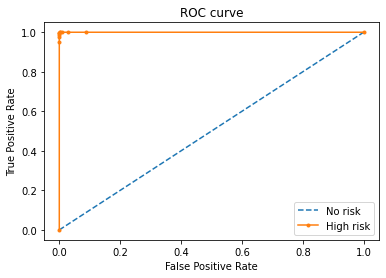

In [ ]:
fit_evaluate_model(bgg_clf,X_train_prep,y_train_prep)

#### * K-fold cross validation

In [ ]:
fit_evaluate_model(bgg_clf,X_train_prep,y_train_prep,has_overfitted=True)


                        precision Score

All the scores: [0.99319728 0.99443672 0.98495212 0.98360656 0.9863388  0.99447514
 0.98624484 0.99311295 0.98758621 0.98758621]
Mean of the scores: 0.9891536813538014
Standard deviation: 0.003974637264108832

*****************************************************


                        recall Score

All the scores: [0.80801105 0.98618785 0.99171271 0.99723757 0.99585635 0.99723757
 0.99171271 0.99723757 0.99308437 0.99309392]
Mean of the scores: 0.9751371663495411
Standard deviation: 0.05580490017159392

*****************************************************


                        f1 Score

All the scores: [0.88787185 0.99238754 0.9896623  0.99242946 0.99037139 0.99307479
 0.9862069  0.99379738 0.99033149 0.99171271]
Mean of the scores: 0.9807845813035574
Standard deviation: 0.031038812490568914

*****************************************************


                        accuracy Score

All the scores: [0.90124309 0.99171271 0.98825967

#### 1.10. Stochastic Gradient Descent Classifier (SGDC)

In [ ]:
sgdc_clf = SGDClassifier(loss='log')

                        Classification Report
              precision    recall  f1-score   support

         0.0       0.63      0.52      0.57      7248
         1.0       0.59      0.70      0.64      7248

    accuracy                           0.61     14496
   macro avg       0.61      0.61      0.60     14496
weighted avg       0.61      0.61      0.60     14496

*****************************************************
Accuracy score 0.6062362030905077
Confusion Matrix


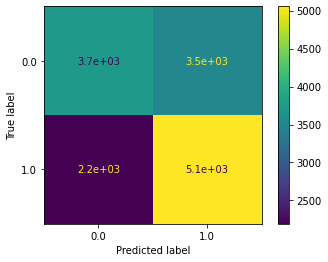

*****************************************************
No risk: ROC AUC=0.500
High risk: ROC AUC=0.659


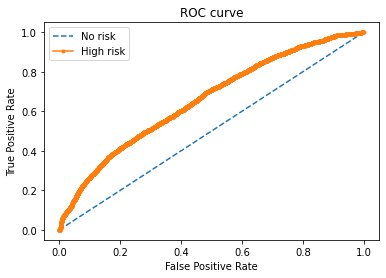

In [ ]:
fit_evaluate_model(sgdc_clf,X_train_prep,y_train_prep)

#### * K-fold cross-validation 

In [ ]:
fit_evaluate_model(sgdc_clf,X_train_prep,y_train_prep,cross_val=True)


                        precision Score

All the scores: [0.63278689 0.58414767 0.53401095 0.56659142 0.63059701 0.57259953
 0.56143498 0.64285714 0.55008489 0.58079096]
Mean of the scores: 0.5855901436072648
Standard deviation: 0.03548519287736178

*****************************************************


                        recall Score

All the scores: [0.91298343 0.51104972 0.76519337 0.85635359 0.07044199 0.88812155
 0.58977901 0.95027624 0.95020747 0.77486188]
Mean of the scores: 0.726926824236033
Standard deviation: 0.2602380022707006

*****************************************************


                        f1 Score

All the scores: [0.67613915 0.63164894 0.69075452 0.40719697 0.60155239 0.6765873
 0.68151016 0.67027027 0.59555556 0.65389082]
Mean of the scores: 0.6285106079693585
Standard deviation: 0.08028292756969246

*****************************************************


                        accuracy Score

All the scores: [0.58356354 0.5980663  0.61740331 0.57

#### 1.11. Neural network (MLPClassifier)

In [ ]:
mlp_clf = MLPClassifier()

                        Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      7248
         1.0       0.95      0.97      0.96      7248

    accuracy                           0.96     14496
   macro avg       0.96      0.96      0.96     14496
weighted avg       0.96      0.96      0.96     14496

*****************************************************
Accuracy score 0.9612306843267108
Confusion Matrix


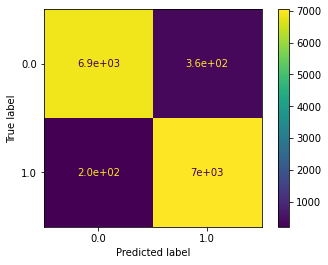

*****************************************************
No risk: ROC AUC=0.500
High risk: ROC AUC=0.995


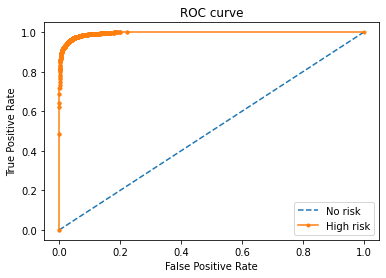

In [ ]:
fit_evaluate_model(mlp_clf,X_train_prep,y_train_prep)

#### * K-fold cross validation

In [ ]:
fit_evaluate_model(mlp_clf,X_train_prep,y_train_prep,has_overfitted=True)

TypeError: fit_evaluate_model() got an unexpected keyword argument 'has_overfitted'